In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from operator import add
import os
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib.ticker import FixedLocator
import matplotlib.font_manager


sns.set_style("ticks")
font = {
    "font.family": "Roboto",
    "font.size": 12,
}
sns.set_style(font)
paper_rc = {
    "lines.linewidth": 3,
    "lines.markersize": 10,
}
sns.set_context("paper", font_scale=1.8, rc=paper_rc)
current_palette = sns.color_palette()
cmp = sns.color_palette("tab10")

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "%.1f" % height,
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 4),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
            size=14,
        )
    
def autolabel_h(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate(
            "%.2f" % width,
            xy=(width, rect.get_y() + rect.get_height() / 2),
            xytext=(18, -1),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="center",
            size=13,
        )

SAVEPATH = './'
os.makedirs(SAVEPATH, exist_ok=True)

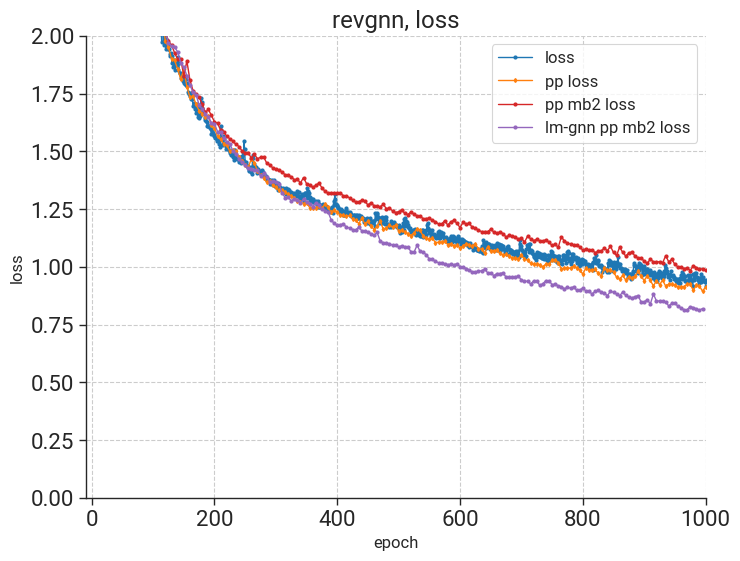

In [5]:
cmp = sns.color_palette("tab10")
import torch

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

# pp_loss_data, idx = np.unique(pp_loss_data, return_index=True)
# sort_idx = np.argsort(idx)
# pp_loss_data = pp_loss_data[sort_idx]
loss_data = np.load('./exps/ogbn-arxiv/revgnn_loss_112layers.npy')
pp_loss_data = np.load('./exps/ogbn-arxiv/revgnn_pp_loss_112layers_1b_1mb.npy')
pp_mb2_loss_data = np.load('./exps/ogbn-arxiv/revgnn_pp_loss_112layers_1b_2mb.npy')
pp_mb4_loss_data = np.load('./exps/ogbn-arxiv/revgat_pp_loss_5layers_1b_4mb.npy')
lm_gnn_pp4_mb2_loss_data = np.load('./exps/ogbn-arxiv/112revgnn_4pp_1b_2mb_deberta_loss.npy')
# pp_mb8_loss_data = np.load('exps/pubmed/gcn_pp_mb8_loss.npy')
# pp_mb16_loss_data = np.load('exps/pubmed/gcn_pp_mb16_loss.npy')
# pp_mb32_loss_data = np.load('exps/pubmed/gcn_pp_mb32_loss.npy')
# pp_mb64_loss_data = np.load('exps/pubmed/gcn_pp_mb64_loss.npy')

x1 = np.arange(pp_loss_data.shape[0])
x1 = x1 * 5
x2 = np.arange(loss_data.shape[0])
x3 = np.arange(lm_gnn_pp4_mb2_loss_data.shape[0])
x3 = x3 * 5

axs.plot(x2,loss_data,label='loss',marker='o',color=cmp[0],linewidth=1,ms=2)
axs.plot(x1,pp_loss_data,label='pp loss',marker='d',color=cmp[1],linewidth=1,ms=2)
axs.plot(x1,pp_mb2_loss_data,label='pp mb2 loss',marker='o',color=cmp[3],linewidth=1,ms=2)
axs.plot(x3,lm_gnn_pp4_mb2_loss_data,label='lm-gnn pp mb2 loss',marker='o',color=cmp[4],linewidth=1,ms=2)
# axs.plot(x1,pp_mb4_loss_data,label='pp mb4 loss',marker='o',color=cmp[2],linewidth=1,ms=2)
# axs.plot(x1,pp_mb8_loss_data,label='gcn pp mb8 loss',marker='o',color=cmp[3],linewidth=1,ms=2)
# axs.plot(x1,pp_mb16_loss_data,label='gcn pp mb16 loss',marker='o',color=cmp[4],linewidth=1,ms=2)
# axs.plot(x1,pp_mb32_loss_data,label='gcn pp mb32 loss',marker='o',color=cmp[5],linewidth=1,ms=2)
# axs.plot(x1,pp_mb64_loss_data,label='gcn pp mb64 loss',marker='o',color=cmp[6],linewidth=1,ms=2)

axs.set_xlabel('epoch',size=12)
axs.set_ylabel('loss',size=12)
# axs[0].set_xticks([0,1000,2000,3000,4000])
axs.tick_params(labelsize=16)
axs.grid(linestyle='--')
axs.title.set_text('revgnn, loss')

axs.set_ylim(0, 2)
axs.set_xlim(-10, 1000)


# handles,labels=plt.gca().get_legend_handles_labels()
axs.legend(
            # loc='upper center', 
            #   bbox_to_anchor=(0.52,1.13), 
              fancybox=True, 
              fontsize=12)
sns.despine()

In [11]:
pp_mb2_loss_data[380]

0.6537958681583405

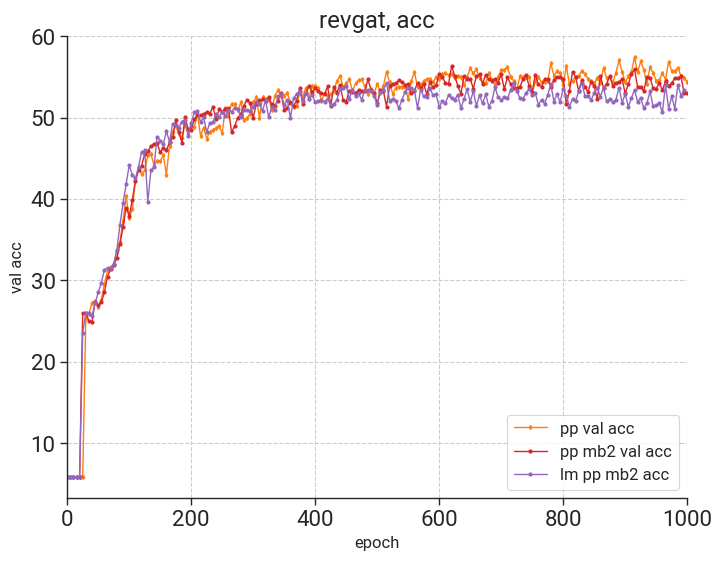

In [16]:
cmp = sns.color_palette("tab10")
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

loss_data = np.load('./exps/ogbn-arxiv/revgnn_test_acc_112layers.npy')
pp_loss_data = np.load('./exps/ogbn-arxiv/revgnn_pp_test_acc_112layers_1b_1mb.npy')
pp_mb2_loss_data = np.load('./exps/ogbn-arxiv/revgnn_pp_test_acc_112layers_1b_2mb.npy')
lm_gnn_pp4_mb2_loss_data = np.load('./exps/ogbn-arxiv/112revgnn_4pp_1b_2mb_deberta_test_acc.npy')
# pp_mb4_loss_data = np.load('./exps/ogbn-arxiv/revgat_pp_val_acc_5layers_1b_4mb.npy')
# pp_mb4_loss_data = np.load('exps/pubmed/gcn_pp_mb4_val_acc.npy')
# pp_mb8_loss_data = np.load('exps/pubmed/gcn_pp_mb8_val_acc.npy')
# pp_mb16_loss_data = np.load('exps/pubmed/gcn_pp_mb16_val_acc.npy')
# pp_mb32_loss_data = np.load('exps/pubmed/gcn_pp_mb32_val_acc.npy')
# pp_mb64_loss_data = np.load('exps/pubmed/gcn_pp_mb64_val_acc.npy')

x1 = np.arange(pp_loss_data.shape[0])
x1 = x1 * 5
x2 = np.arange(loss_data.shape[0])
x3 = np.arange(lm_gnn_pp4_mb2_loss_data.shape[0])
x3 = x3 * 5
# x2 = x2 * 5

# axs.plot(x2,loss_data,label='val acc',marker='o',color=cmp[0],linewidth=1,ms=2)
axs.plot(x1,pp_loss_data,label='pp val acc',marker='d',color=cmp[1],linewidth=1,ms=2)
axs.plot(x1,pp_mb2_loss_data,label='pp mb2 val acc',marker='o',color=cmp[3],linewidth=1,ms=2)
axs.plot(x3,lm_gnn_pp4_mb2_loss_data,label='lm pp mb2 acc',marker='o',color=cmp[4],linewidth=1,ms=2)
# axs.plot(x1,pp_mb4_loss_data,label='pp mb4 val acc',marker='o',color=cmp[2],linewidth=1,ms=2)
# # axs.plot(x1,pp_mb8_loss_data,label='gcn pp mb8 loss',marker='o',color=cmp[3],linewidth=1,ms=2)
# axs.plot(x1,pp_mb16_loss_data,label='gcn pp mb16 acc',marker='o',color=cmp[4],linewidth=1,ms=2)
# # axs.plot(x1,pp_mb32_loss_data,label='gcn pp mb32 loss',marker='o',color=cmp[5],linewidth=1,ms=2)
# axs.plot(x1,pp_mb64_loss_data,label='gcn pp mb64 acc',marker='o',color=cmp[6],linewidth=1,ms=2)

axs.set_xlabel('epoch',size=12)
axs.set_ylabel('val acc',size=12)
# axs[0].set_xticks([0,1000,2000,3000,4000])
axs.tick_params(labelsize=16)
axs.grid(linestyle='--')
axs.title.set_text('revgat, acc')

# axs.set_ylim(50, 75)
axs.set_xlim(0, 1000)


# handles,labels=plt.gca().get_legend_handles_labels()
axs.legend(
            # loc='upper center', 
            #   bbox_to_anchor=(0.52,1.13), 
              fancybox=True, 
              fontsize=12)
sns.despine()

In [18]:
max(pp_mb2_loss_data)

56.33744855967078

In [31]:
import torch
import dgl
from ogb.nodeproppred import DglNodePropPredDataset, NodePropPredDataset
import random

seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

dataset_dir = "/home/mzhang/data/"
ogb_dataset = DglNodePropPredDataset(name="ogbn-arxiv", root=dataset_dir)
g, data_y = ogb_dataset[0]
data_y = torch.as_tensor(data_y).squeeze(1)
split_idx = ogb_dataset.get_idx_split()
data_x = torch.as_tensor(g.ndata["feat"])
num_classes = ogb_dataset.num_classes

each_chunk_idx = torch.arange(100)
chunk_g = dgl.node_subgraph(g, each_chunk_idx)
a = g.nodes()
b = chunk_g.ndata['_ID']
print(b)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99])


In [3]:
import torch

valid_indices = torch.tensor([1, 2, 0, 1, 1])
valid_labels = torch.tensor([1, 1, 2, 1, 1])
correct = torch.sum(valid_indices == valid_labels)
valid_indices == valid_labels

tensor([ True, False, False,  True,  True])

In [18]:
import torch
LM_emb_path = f"./lm_workloads/prt_lm/ogbn-arxiv2/microsoft/deberta-base-seed0.emb"
if os.path.exists(LM_emb_path):
    print(f"LM_emb_path: {LM_emb_path}")
    features = torch.from_numpy(np.array(
            np.memmap(LM_emb_path, mode='r',
                    dtype=np.float16,
                    shape=(169340, 128)))
    ).to(torch.float32)
zero_rows = torch.count_nonzero(features[:, 0]).item()
zero_rows

LM_emb_path: ./lm_workloads/prt_lm/ogbn-arxiv2/microsoft/deberta-base-seed0.emb


14341

In [15]:
zero_rows = torch.count_nonzero(features[:, 0]).item()
zero_rows

1368